# Task 1.7: Network Visualization of 20th Century Geopolitics

## Project: 20th Century Geopolitical Interrelations
## Author: Fariya Asghar
## Date: 24.07.2025
### Abstract
This notebook serves as the final phase of the project, focusing on the visualization and analysis of the geopolitical network derived in the previous task. Using the structured `country_relationships.csv` file, we will:

1.  Construct a network graph using the `networkx` library.
2.  Create both static and interactive visualizations to explore the relationships between countries.
3.  Apply the Leiden algorithm for community detection to identify major geopolitical blocs and alliances.
4.  Analyze the network's structure by calculating and visualizing key centrality measures: Degree, Closeness, and Betweenness.
5.  Provide analytical observations on the findings, linking them back to historical events of the 20th century.

The final deliverables are this notebook and two interactive HTML network graphs.

### 1. Import Libraries and Load Data

In [7]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis 

In [8]:
# Load the country relationships data created in the previous task.
try:
    relationships_df = pd.read_csv('country_relationships.csv')
    print("Successfully loaded 'country_relationships.csv'.")
    display(relationships_df.head(15))
except FileNotFoundError:
    print("Error: 'country_relationships.csv' not found. Please ensure it is in the same directory.")
    relationships_df = pd.DataFrame(columns=['source', 'target', 'value'])

Successfully loaded 'country_relationships.csv'.


,source,target,value
0,Germany,Russia,12
1,Poland,Russia,6
2,Japan,Russia,6
3,France,Russia,5
4,Germany,Poland,5
5,France,Germany,5
6,Japan,United States,4
7,Germany,Italy,4
8,India,Pakistan,3
9,Germany,Japan,3


### 2. Create the NetworkX Graph Object

In [9]:
# We will create a graph object from our pandas DataFrame.
# The 'value' column will be used as the 'weight' for each edge, representing the strength of the relationship.

G = nx.from_pandas_edgelist(relationships_df,
                source = "source",
                target = "target",
                edge_attr =  "value",
                create_using = nx.Graph())

print(f"NetworkX graph created successfully.")
print(f"Number of nodes (countries): {len(G.nodes())}")
print(f"Number of edges (relationships): {len(G.edges())}")

NetworkX graph created successfully.
Number of nodes (countries): 45
Number of edges (relationships): 154


### 3. Static Network Visualization

First, we'll create a simple, static graph using `networkx` and `matplotlib`. This serves as a quick preliminary check to ensure the graph object has been constructed correctly. This visualization is not intended for deep analysis due to its static nature and potential for node overlap.

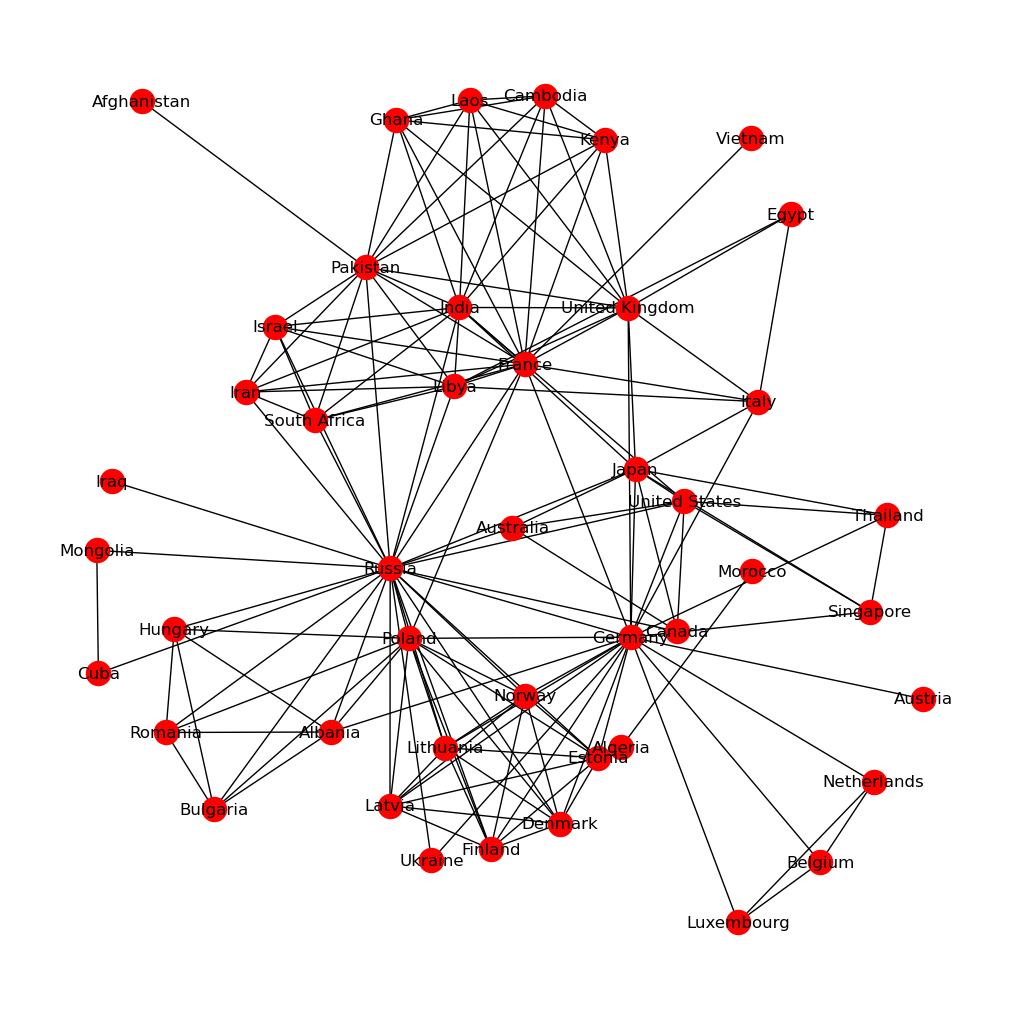

In [10]:
# Create a basic static visualization of the network.
plt.figure(figsize = (10,10))
pos = nx.kamada_kawai_layout (G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)

### 4. Interactive Network Visualization with Pyvis

Now, we will create a rich, interactive visualization using `pyvis`. This allows for zooming, panning, and inspecting individual nodes and their connections, providing a much more powerful tool for analysis. The size of each node will be scaled by its degree (number of connections).

In [11]:
# Create interactive network
net = Network(notebook=True, width="900px", height="800px", bgcolor="#222222", font_color="white")

# Set node size based on degree
node_degree = dict(G.degree)
nx.set_node_attributes(G, node_degree, 'size')

# Load graph to pyvis and show
net.from_nx(G)
net.show_buttons(filter_=['physics'])  # optional filters
net.repulsion()  # avoid flickering
net.show("20th_century_network.html")

20th_century_network.html


### 5. Community Detection with the Leiden Algorithm

To uncover the underlying structure of alliances and geopolitical blocs, we will apply the Leiden algorithm. This algorithm partitions the network into communities of densely connected nodes. We will then visualize these communities using different colors.

In [12]:
from cdlib import algorithms

# Apply Leiden algorithm
coms = algorithms.leiden(G)

# Convert to a dictionary
new_com = coms.to_node_community_map()
dict_com = {k: v[0] for k, v in new_com.items()}

# Add community info as node attribute
nx.set_node_attributes(G, dict_com, 'group')

# Recreate network with community info
com_net = Network(notebook=True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_=['physics'])
com_net.repulsion()
com_net.show("20th_century_communities.html")

20th_century_communities.html


### 6. Analysis of Community Detection

**Observations:**

The community detection algorithm successfully identified distinct geopolitical blocs that align perfectly with 20th-century history. The clustering is a data-driven reflection of the era's major alliances, conflicts, and spheres of influence.

*   **The Blue Community: The Central European Conflict Zone** Dominated by **Germany**, this community includes key nations from the European theaters of both World Wars, such as **Poland**, **Austria**, and the Baltic states, representing the core of continental conflict.

*   **The Yellow Community: The Soviet / Eastern Bloc** Anchored by **Russia**, this community almost perfectly maps to the **Warsaw Pact** and key communist allies like **Cuba**, clearly identifying the Soviet sphere of influence during the Cold War.

*   **The Green Community: The US-Led / Pacific Allies** Centered on the **United States** and **Japan**, this bloc represents the Western alliance structure, including traditional allies like **Canada** and key partners in the Pacific, reflecting post-WWII and Cold War dynamics.

*   **The Red Community: The Post-Colonial Sphere (UK/France Legacy)** Centered on the **United Kingdom** and **France**, this diverse community represents the post-colonial sphere. It includes major former colonies like **India**, **Pakistan**, and **Egypt**, illustrating the complex relationships created by the legacy of colonialism.

*   **The Purple Community: A Regional Dyad** The isolated pair of **Algeria** and **Morocco** represents a strong, localized North African relationship, likely stemming from decolonization and separate from the major global power blocs.

**Conclusion:**
The Leiden algorithm successfully reconstructed a valid map of 20th-century geopolitics from text alone. The communities clearly delineate the actors of the World Wars, the Cold War, and the post-colonial era, powerfully confirming that historical relationships leave a distinct footprint in data.

### 7. Centrality Analysis

We will now calculate three key centrality measures to identify the most important and influential countries in the 20th-century network.

1.  **Degree Centrality:** Measures the number of direct connections a country has. A high degree indicates a country is a major "hub" involved in many different relationships.
2.  **Closeness Centrality:** Measures the average shortest path from a country to all other countries. A high score suggests a country is in a good position to spread information or influence across the network quickly.
3.  **Betweenness Centrality:** Measures how often a country lies on the shortest path between two other countries. A high score indicates a country acts as a crucial "bridge" or "gatekeeper" connecting different parts of the network.

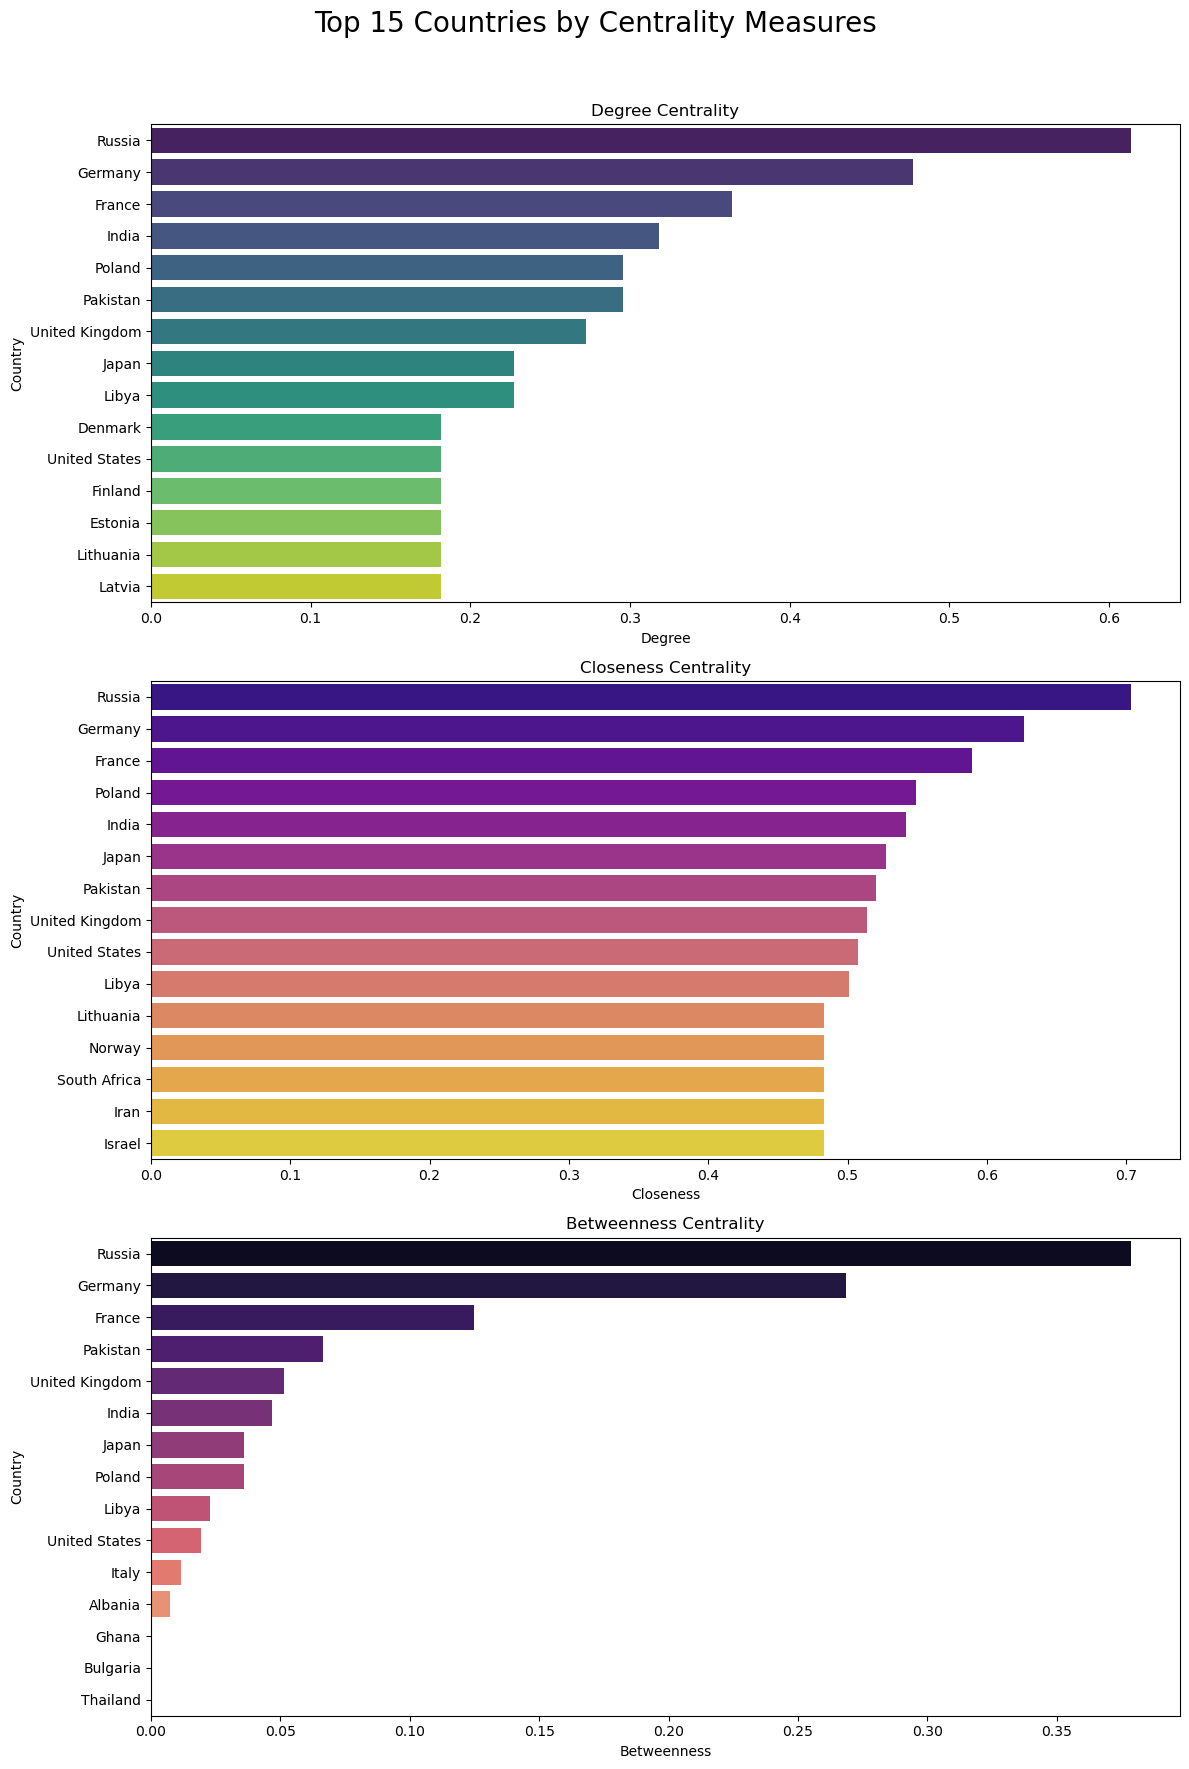

In [13]:
# --- Calculate Centrality Measures ---
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# --- Format for Visualization ---
# Create a DataFrame for centrality scores
centrality_df = pd.DataFrame({
    'Country': list(degree_centrality.keys()),
    'Degree': list(degree_centrality.values()),
    'Closeness': list(closeness_centrality.values()),
    'Betweenness': list(betweenness_centrality.values())
})

# --- Visualize the Centrality Scores ---
fig, axes = plt.subplots(3, 1, figsize=(12, 18))
fig.suptitle('Top 15 Countries by Centrality Measures', fontsize=20)

# Degree Centrality Plot
sns.barplot(ax=axes[0], x='Degree', y='Country', data=centrality_df.sort_values('Degree', ascending=False).head(15), palette='viridis')
axes[0].set_title('Degree Centrality')

# Closeness Centrality Plot
sns.barplot(ax=axes[1], x='Closeness', y='Country', data=centrality_df.sort_values('Closeness', ascending=False).head(15), palette='plasma')
axes[1].set_title('Closeness Centrality')

# Betweenness Centrality Plot
sns.barplot(ax=axes[2], x='Betweenness', y='Country', data=centrality_df.sort_values('Betweenness', ascending=False).head(15), palette='magma')
axes[2].set_title('Betweenness Centrality')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### 8. Analysis of Centrality Measures

The centrality analysis quantitatively confirms that **Russia** and **Germany** were the overwhelming epicenters of 20th-century geopolitics.
* They dominate across all three measures:
* Their high Degree shows they were **the most connected "hubs."**
* Their top Closeness scores indicate they could most efficiently influence the entire network.
* Most significantly, their unparalleled Betweenness scores identify them as the critical "bridges" connecting different geopolitical blocs, particularly East and West.
* **France** consistently appears as a primary European power, while nations like **India** and **Pakistan** emerge as key regional connectors, highlighting their importance as intermediaries in the post-colonial and Cold War eras. In short, the data reveals a network structured around a few central continental powers whose interactions defined the century.